# Thermophysical properties of CO$_2$ #

Calculate the thermophysical properties of CO$_2$.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Density ##

Calculate the density of CO$_2$ as a function of pressure and temperature.

Simple correlation for gas density from Pruess.


In [10]:
def co2density(p, t) :
    # Need temperature in K
    pc = p* 1.e-6
    tk = t + 273.15
    tb = tk * 1.e-2
    tc = tb**(10./3.)
    
    vc1 = 1.8882e-4 * tk
    vc2 = - pc * (8.24e-2 + 1.249e-2 * pc) / tc

    return pc/(vc1+vc2)

Plot of the parameters $n_1$ and $n_2$, which corresponds to Figure 4 in Drieser (2007).

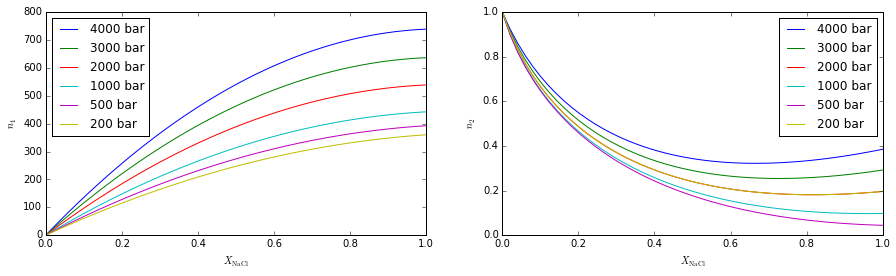

In [13]:
Xdata = np.linspace(0,1)

fig, axes = plt.subplots(1,2, figsize=(15,4))

axes[0].plot(Xdata, n1(4000,Xdata), label='4000 bar'); axes[1].plot(Xdata, n2(4000,Xdata), label='4000 bar');
axes[0].plot(Xdata, n1(3000,Xdata), label='3000 bar'); axes[1].plot(Xdata, n2(3000,Xdata), label='3000 bar');
axes[0].plot(Xdata, n1(2000,Xdata), label='2000 bar'); axes[1].plot(Xdata, n2(2000,Xdata), label='2000 bar');
axes[0].plot(Xdata, n1(1000,Xdata), label='1000 bar'); axes[1].plot(Xdata, n2(1000,Xdata), label='1000 bar');
axes[0].plot(Xdata, n1(500,Xdata), label='500 bar');  axes[1].plot(Xdata, n2(500,Xdata), label='500 bar');
axes[0].plot(Xdata, n1(200,Xdata), label='200 bar');  axes[1].plot(Xdata, n2(2000,Xdata), label='200 bar');
axes[0].set_xlabel('$X_{\mathrm{NaCl}}$'); axes[1].set_xlabel('$X_{\mathrm{NaCl}}$')
axes[0].set_ylabel('$n_1$'); axes[1].set_ylabel('$n_2$');
axes[0].legend(loc = 'upper left'); axes[1].legend()

Density data from Pitzer et al, *Thermodynamic properties of aqueous sodium chloride solution*, Journal of Physical and Chemical Reference Data, 13, 1-102 (1984). (Density is in g/cm^3, multiply by 1000 to get kg/m^3).

The first data set is for P = 200bar, t = 50C, and molality as specified.

The second data set is for P = 400bar, t = 100C, and molality as specified.

In [51]:
moldata = np.array([0.1, 0.25, 0.5, 0.75, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0])

rhodata_p200_t50 = np.array([1.00045, 1.00622, 1.01564, 1.02487, 1.0339, 1.06852, 1.10087, 1.13123, 1.15982, 1.18682])
rhodata_p400_t100 = np.array([0.98002, .98573, 0.99503, 1.00411, 1.01301, 1.04704, 1.07887, 1.10875, 1.13685, 1.16331])

Read in MOOSE data for comparison.

In [52]:
moosedata1 = pd.read_csv('gold/BrineProperty_density_vpp_0001.csv')
moosedata2 = pd.read_csv('gold/BrineProperty_density2_vpp_0001.csv')

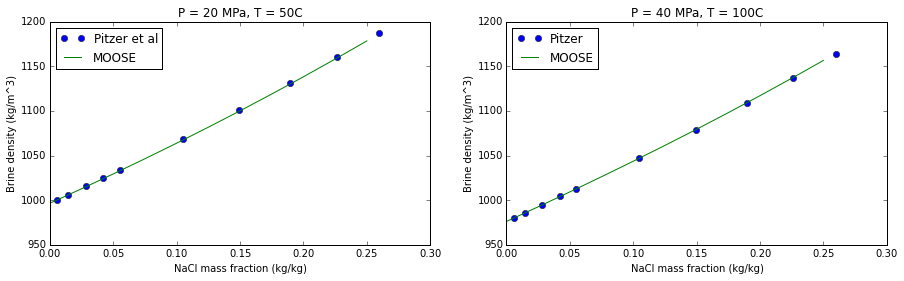

In [53]:
fig, axes = plt.subplots(1,2, figsize=(15,4))

# P = 20Mpa, T = 50C
axes[0].plot(mol2mass(moldata), 1000*rhodata_p200_t50, 'o',label='Pitzer et al')
axes[0].plot(0.125*moosedata1.x, moosedata1.BrinePropertyAuxVariable, label='MOOSE')
axes[0].set_xlabel('NaCl mass fraction (kg/kg)')
axes[0].set_ylabel('Brine density (kg/m^3)')
axes[0].set_title('P = 20 MPa, T = 50C')
axes[0].legend(loc = 'upper left')

# P = 40Mpa, T = 100C
axes[1].plot(mol2mass(moldata), 1000*rhodata_p400_t100, 'o', label='Pitzer')
axes[1].plot(0.125*moosedata2.x, moosedata2.BrinePropertyAuxVariable, label='MOOSE')
axes[1].set_xlabel('NaCl mass fraction (kg/kg)')
axes[1].set_ylabel('Brine density (kg/m^3)')
axes[1].set_title('P = 40 MPa, T = 100C')
axes[1].legend(loc = 'upper left')

Conversion from mole fraction to mass fraction.

In [21]:
Mnacl = 58.443e-3
Mh2o = 18.015e-3

# Average molar mass using mole fraction
def MX(X) :
    return X * Mnacl + (1.0 - X) * Mh2o

# Average molar mass using mass fraction
def Mx(x) :
    return 1/(x/Mnacl + (1.0-x)/Mh2o)

# Function to convert mole fraction (X) to mass fraction (x)
def molf2massf(X) :
    return X * Mnacl /(X * Mnacl + (1.0-X)*Mh2o)

Check the functions return the same quantity.

In [22]:
print MX(0.1)
print Mx(molf2massf(0.1))

0.0220578
0.0220578


## Viscosity ##

Calculate the density of viscosity as a function of pressure, temperature and salt mole fraction.

Correlations from Phillips et al, *A technical databook for geothermal energy utilization*, LBL-12810 (1981).

NOTE: the correlation requires molal concentration (mol/kg).

Experimental data from Phillips et al, *Viscosity of NaCl and other solutions up to 350C and 50MPa pressures*, LBL-11586 (1980). Consider two cases: T = 50C and P = 10MPa, and T = 100C, P = 20MPa, for molal concentrations from 0 to 5 mol/kg. Viscosity is in cP (multiply by 1e-3 to get Pa.s). 

In [54]:
molconcdata = np.array([0.,1.,2.,3.,4.,5.])
expdata_t50_p10 = np.array([0.5460, 0.6081, 0.6777, 0.7593, 0.8545, 0.9642])
expdata_t100_p20 = np.array([0.2870, 0.3230, 0.3617, 0.4056, 0.4559, 0.5137])

The mass fraction corresponding to these molalities are

In [24]:
mol2mass(molconcdata)

array([ 0.        ,  0.05521601,  0.10465347,  0.1491744 ,  0.18947747,
        0.22613497])

In [55]:
def mass2mol(x) :
    return x / ((1.0 - x)*Mnacl)

Read in MOOSE data for comparison.

In [56]:
moosedata1 = pd.read_csv('gold/BrineProperty_viscosity1_vpp_0001.csv')
moosedata2 = pd.read_csv('gold/BrineProperty_viscosity2_vpp_0001.csv')

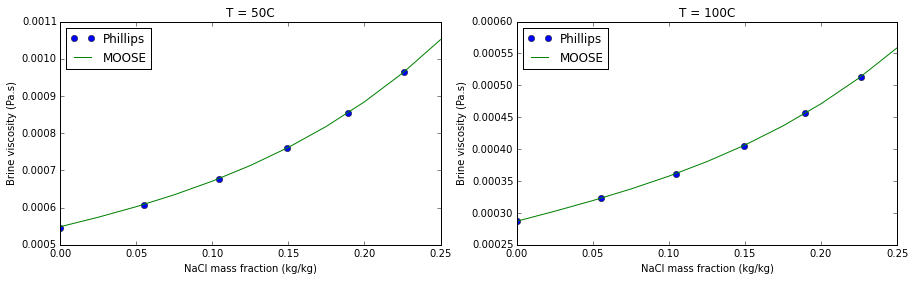

In [57]:
fig, axes = plt.subplots(1,2, figsize=(15,4))

# T = 50C
axes[0].plot(mol2mass(molconcdata), 1.e-3*expdata_t50_p10, 'o',label='Phillips')
axes[0].plot(0.125*moosedata1.x, moosedata1.BrinePropertyAuxVariable, label='MOOSE')
axes[0].set_xlabel('NaCl mass fraction (kg/kg)')
axes[0].set_ylabel('Brine viscosity (Pa.s)')
axes[0].set_title('T = 50C')
axes[0].legend(loc = 'upper left')

# T = 100C
axes[1].plot(mol2mass(molconcdata), 1.e-3*expdata_t100_p20, 'o', label='Phillips')
axes[1].plot(0.125*moosedata2.x, moosedata2.BrinePropertyAuxVariable, label='MOOSE')
axes[1].set_xlabel('NaCl mass fraction (kg/kg)')
axes[1].set_ylabel('Brine viscosity (Pa.s)')
axes[1].set_title('T = 100C')
axes[1].legend(loc = 'upper left')

## Henry's law coefficient ##

Calculate the Henry's law coefficient for CO$_2$ in water using the correlation from From Battistelli et al, *A fluid property module for the TOUGH2 simulator for saline brines with non-condensible gas*. Proc. Eighteenth Workshop onGeothermal Reservoir Engineering, Stanford University, (1993).



In [31]:
moosedata = pd.read_csv('gold/CO2Property_henry_vpp_0001.csv')

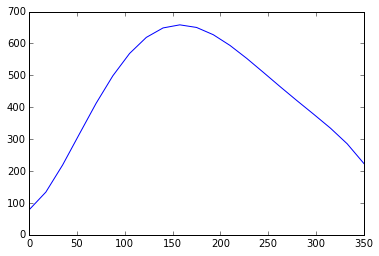

In [34]:
plt.plot(175*moosedata.x, moosedata.CO2PropertyAuxVariable*1e-6)